In [219]:
PAIRS_METADATA = {
    "adausdt" : {
        "tick_size" : 0.0001
    },
    "btcusdt" : {
        "tick_size" : 0.01
    },
    "ethusdt" : {
        "tick_size" : 0.01
    },
}

In [276]:
import pandas as pd

PAIRS = [
    "adausdt",
    "bnbusdt",
    "btcusdt",
    "dogeusdt",
    "ethusdt",
    "solusdt",
    "trxusdt",
    "xrpusdt"
]

DATES = [
    "20231114",
    "20231115",
    "20231116",
    "20231117"
]

pair = PAIRS[2]
date = DATES[0]

lob_path = f"preprocessed_data/{pair}/{date}/orderbook/take_1.csv"
trades_path = f"preprocessed_data/{pair}/{date}/aggTrades/take_1.csv"

columns = ["E", "b1", "vb1", "a1", "va1"]
lob = pd.read_csv(lob_path, index_col=0)#[columns]
lob["E"] = lob["E"].apply(lambda x : datetime.fromtimestamp(x/1000))



# distance in ticks between non-empty levels 

In [242]:
df = pd.DataFrame(
    data = {
        "mprice" : (lob['a1'] + lob['b1'])/2,
        "wprice" : lob['a1']*lob['vb1']/(lob['vb1'] + lob['va1']) + lob['b1']*lob['va1']/(lob['vb1'] + lob['va1'])
    }
)

In [244]:
print(((lob['a2'] - lob['a1'])/0.01).describe())
print(((lob['a3'] - lob['a2'])/0.01).describe())
print(((lob['a4'] - lob['a3'])/0.01).describe())
print(((lob['a5'] - lob['a4'])/0.01).describe())

count    287745.000000
mean         21.165191
std          36.710511
min           1.000000
25%           3.000000
50%          11.000000
75%          28.000000
max        4679.000000
dtype: float64
count    287745.000000
mean         20.787739
std          33.609982
min           1.000000
25%           4.000000
50%          12.000000
75%          30.000000
max        5029.000000
dtype: float64
count    287745.000000
mean         20.350136
std          28.668161
min           1.000000
25%           4.000000
50%          13.000000
75%          31.000000
max        4366.000000
dtype: float64
count    287745.000000
mean         20.364465
std          25.506481
min           1.000000
25%           5.000000
50%          14.000000
75%          31.000000
max        2422.000000
dtype: float64


In [245]:
print(((lob['b1'] - lob['b2'])/0.01).describe())
print(((lob['b2'] - lob['b3'])/0.01).describe())
print(((lob['b3'] - lob['b4'])/0.01).describe())
print(((lob['b4'] - lob['b5'])/0.01).describe())

count    287745.000000
mean         21.915171
std          38.583879
min           1.000000
25%           3.000000
50%          11.000000
75%          29.000000
max        4187.000000
dtype: float64
count    287745.000000
mean         20.935161
std          29.938207
min           1.000000
25%           4.000000
50%          12.000000
75%          31.000000
max        2319.000000
dtype: float64
count    287745.000000
mean         20.386193
std          26.456496
min           1.000000
25%           4.000000
50%          13.000000
75%          31.000000
max        1936.000000
dtype: float64
count    287745.000000
mean         20.058510
std          23.472795
min           1.000000
25%           4.000000
50%          14.000000
75%          31.000000
max        1078.000000
dtype: float64


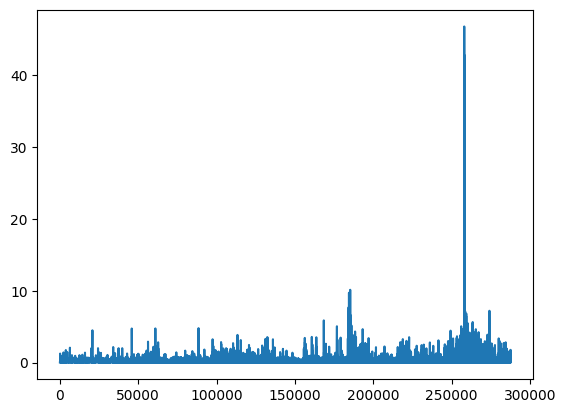

In [246]:
plt.plot(lob['a2'] - lob['a1'])

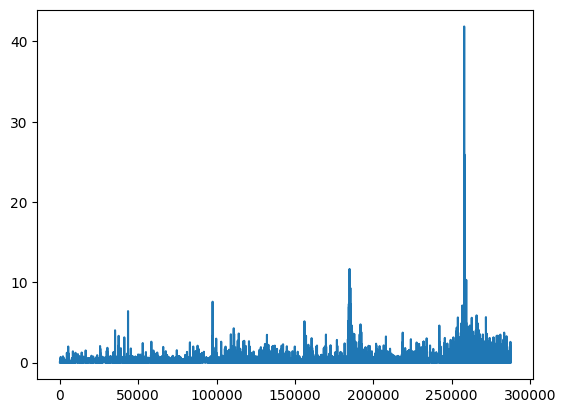

In [247]:
plt.plot(lob['b1'] - lob['b2'])

<Axes: >

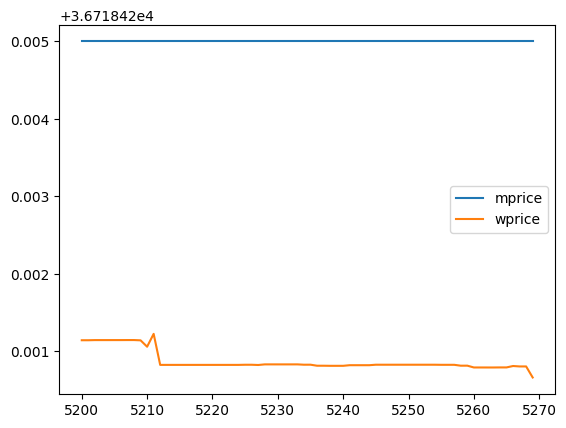

In [250]:
n = 70
i = 5200
df.iloc[i: i + n][["mprice", "wprice"]].plot()

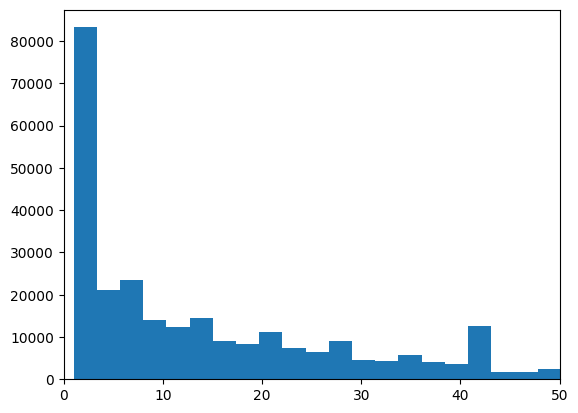

In [254]:
_ = plt.hist((lob['a2'] - lob['a1'])/0.01, bins=2000)
plt.xlim(0, 50)
plt.show()

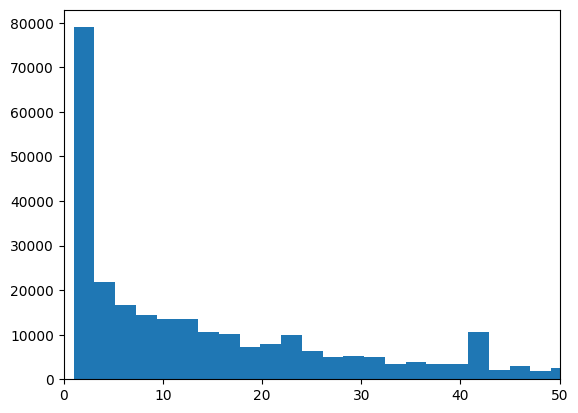

In [255]:
_ = plt.hist((lob['b1'] - lob['b2'])/0.01, bins=2000)
plt.xlim(0, 50)
plt.show()

# distribution of volume on LOB

In [257]:
lob[["E", "vb2", "b2", "vb1", "b1", "a1", "va1", "a2", "va2"]].tail(30)

,E,vb2,b2,vb1,b1,a1,va1,a2,va2
287715,2023-11-14 17:22:51.950,0.21181,36326.84,4.12020,36327.14,36327.15,0.02446,36327.86,0.02693
287716,2023-11-14 17:22:52.050,0.21181,36326.84,4.12165,36327.14,36327.15,0.02446,36327.86,0.02693
287717,2023-11-14 17:22:52.150,0.21181,36326.84,4.49060,36327.14,36327.15,0.02474,36327.29,0.27527
287718,2023-11-14 17:22:52.250,0.21181,36326.84,4.49060,36327.14,36327.15,0.02474,36327.86,0.02693
287719,2023-11-14 17:22:52.350,0.27133,36330.69,2.54613,36331.25,36331.26,2.26020,36331.63,0.11600
287720,2023-11-14 17:22:52.450,0.26000,36330.69,2.53587,36331.25,36331.26,2.41282,36331.41,0.02693
287721,2023-11-14 17:22:52.550,0.26000,36330.69,2.53005,36331.25,36331.26,2.47645,36331.41,0.02693
287722,2023-11-14 17:22:52.650,0.26000,36330.69,2.53005,36331.25,36331.26,2.35822,36331.41,0.02693
287723,2023-11-14 17:22:52.750,0.26000,36330.69,2.53005,36331.25,36331.26,3.13868,36331.41,0.02693
287724,2023-11-14 17:22:52.850,0.26000,36330.69,2.53005,36331.25,36331.26,3.15443,36331.41,0.02693


In [277]:
trades = pd.read_csv(trades_path, index_col=0)
trades["E"] = trades["E"].apply(lambda x : datetime.fromtimestamp(x/1000))

In [278]:
n = -1260
trades.iloc[n:n+50]

,E,a,p,q,f,l,T,m
410388,2023-11-14 17:22:06.754,2.756545e+09,36315.68,0.00026,3.280443e+09,3.280443e+09,1.699979e+12,1.0
410389,2023-11-14 17:22:06.784,2.756545e+09,36315.68,0.02100,3.280443e+09,3.280443e+09,1.699979e+12,1.0
410390,2023-11-14 17:22:06.834,2.756545e+09,36315.69,0.02772,3.280443e+09,3.280443e+09,1.699979e+12,0.0
410391,2023-11-14 17:22:06.834,2.756545e+09,36315.74,0.00032,3.280443e+09,3.280443e+09,1.699979e+12,0.0
410392,2023-11-14 17:22:07.023,2.756545e+09,36315.77,0.00485,3.280443e+09,3.280443e+09,1.699979e+12,1.0
410393,2023-11-14 17:22:07.048,2.756545e+09,36315.77,0.00040,3.280443e+09,3.280443e+09,1.699979e+12,1.0
410394,2023-11-14 17:22:07.076,2.756545e+09,36315.77,0.03355,3.280443e+09,3.280443e+09,1.699979e+12,1.0
410395,2023-11-14 17:22:07.108,2.756545e+09,36315.77,0.00125,3.280443e+09,3.280443e+09,1.699979e+12,1.0
410396,2023-11-14 17:22:07.409,2.756545e+09,36315.77,0.00104,3.280443e+09,3.280443e+09,1.699979e+12,1.0
410397,2023-11-14 17:22:07.757,2.756545e+09,36315.78,0.00113,3.280443e+09,3.280443e+09,1.699979e+12,0.0


In [286]:
trades[trades["m"] == 1.0]["q"].describe()

count    209925.000000
mean          0.043030
std           0.231784
min           0.000010
25%           0.000670
50%           0.001760
75%           0.010510
max          21.849910
Name: q, dtype: float64

In [287]:
trades[trades["m"] == 0.0]["q"].describe()

count    201723.000000
mean          0.039060
std           0.197878
min           0.000010
25%           0.000670
50%           0.001890
75%           0.011810
max          19.714310
Name: q, dtype: float64